# Subject Area
##### This data set consists of Placement data of students in our campus. It includes ,
1. secondary and higher secondary school percentage and specialization.
2. degree specialization, type and Work experience and salary offers to the placed students

# Task: 
##### Supervised Machine Learning > Classification (binary) Problem

# Description About Data:
This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

Source: https://www.kaggle.com/benroshan/factors-affecting-campus-placement or

https://www.kaggle.com/c/ml-with-python-course-project/data

Attribute Information:
sl_no Serial Number

gender Gender- Male='M',Female='F'(male=0, female=1)

ssc_p Secondary Education percentage- 10th Grade

ssc_b Board of Education- Central/ Others

hsc_p Higher Secondary Education percentage- 12th Grade

hsc_b Board of Education- Central/ Others

hsc_s Specialization in Higher Secondary Education

degree_p Degree Percentage

degree_t Under Graduation(Degree type)- Field of degree education

workex Work Experience

etest_p Employability test percentage ( conducted by college)

specialisation Post Graduation(MBA)- Specialization

mba_p MBA percentage

status Status of placement- Placed/Not placed

salary Salary offered by corporate to candidates



# Topics to cover:
1. Importing Libraries
2. Importing Dataset
3. Basic Questions to Ask from Data
4. Data Cleaning
5. Exploratory Data Analysis (EDA)

# 1. Importing Dependencies/Libraries

# Data and Analysis

In [1]:
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats
from scipy.stats import norm
import psycopg2 as ps

# Visualization

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings("ignore")

# ML Libraries

In [3]:
from sklearn import metrics
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# 2. Data Importing

In [4]:
#Establishing connection with postgres
connection = ps.connect(dbname="mini_project", user="postgres", password="5252")

In [5]:
#Creating and opening cursor
cur=connection.cursor()

In [18]:
#Creating Postgres Table
cur.execute("CREATE TABLE placement (sl_no integer PRIMARY KEY, gender int, ssc_p float,ssc_b text,hsc_p float,hsc_b text,hsc_s text,degree_p float,degree_t text,workex text,etest_p float,specialisation text,mba_p float,status text,salary float);")
print("Table Created")

DuplicateTable: relation "placement" already exists


In [6]:
#Saving all changes to postgres
connection.commit()

In [6]:
#Query to copy csv into postgres table using COPY FROM command
ins3="COPY placement FROM 'C:\\Users\\Public\\train_placement.csv' DELIMITER ','CSV HEADER;"
cur.execute(ins3)

UniqueViolation: duplicate key value violates unique constraint "placement_pkey"
DETAIL:  Key (sl_no)=(1) already exists.
CONTEXT:  COPY placement, line 2


In [6]:
#Saving all the changes
connection.commit()

In [7]:
#Extracting data from postgres to pandas
df=pd.read_sql('select * from placement',connection)

C:\m_pf\anaconda\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [8]:
#showing sample
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# 3. Basic Questions To Ask From Data?
1. How does data looks like?
2. What is size of Data?
3. What are the features in data?
4. Basic infromation about data (null values and data types)
5. Duplicate values(rows) in data
6. Statistical Description about Data
7. Correlation among features
8. Unique number of values in a particular feature

# 1. How does data looks like?

In [9]:
#How does data looks like? /sample 5 rows
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
203,204,0,55.68,Others,61.33,Others,Commerce,56.87,Comm&Mgmt,No,66.00,Mkt&HR,58.30,Placed,260000.0
74,75,0,56.60,Central,64.80,Central,Commerce,70.20,Comm&Mgmt,No,84.27,Mkt&Fin,67.20,Placed,336000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
119,120,0,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
127,128,1,72.00,Others,60.00,Others,Science,69.00,Comm&Mgmt,No,55.50,Mkt&HR,58.40,Placed,250000.0


# 2. What is size of Data?

In [10]:
#What is size of Data? /shape of data
df.shape
#Observation-->rows=215, columns=15

(215, 15)

# 3. What are the features in data?

In [11]:
#What are the features in data? /names of columns
df.columns
#Observation-->Column names aren't understandable, will change in data cleaning

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# 4. Basic infromation about data 

# (null values and data types)

In [12]:
#basic information about data
df.info()
#Observation-->some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [13]:
#percent of null values
np.round((df.isnull().sum()/df.shape[0])*100, 2)
#Observation-->Salary column seems to have 30% null values, 
#will handle missing values in Feuture Engineering

sl_no              0.00
gender             0.00
ssc_p              0.00
ssc_b              0.00
hsc_p              0.00
hsc_b              0.00
hsc_s              0.00
degree_p           0.00
degree_t           0.00
workex             0.00
etest_p            0.00
specialisation     0.00
mba_p              0.00
status             0.00
salary            31.16
dtype: float64

# 5. Duplicate values(rows) in data

In [14]:
#duplicates
df.duplicated().sum()
#Observation-->no duplicates in data

0

# 6. Statistical Description about Data

In [15]:
#Statistical Description(only for numerical features)
df.describe()
#Observation-->Salary column seems to have right outliers and missing values

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# 7. Correlation among features

In [16]:
df.corr()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.074306,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
gender,-0.074306,1.000000,0.068969,0.021334,0.173217,-0.084294,0.300531,-0.158912
ssc_p,-0.078155,0.068969,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.021334,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.173217,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,-0.084294,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.300531,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,-0.158912,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


# 8. Unique number of values in a particular feature

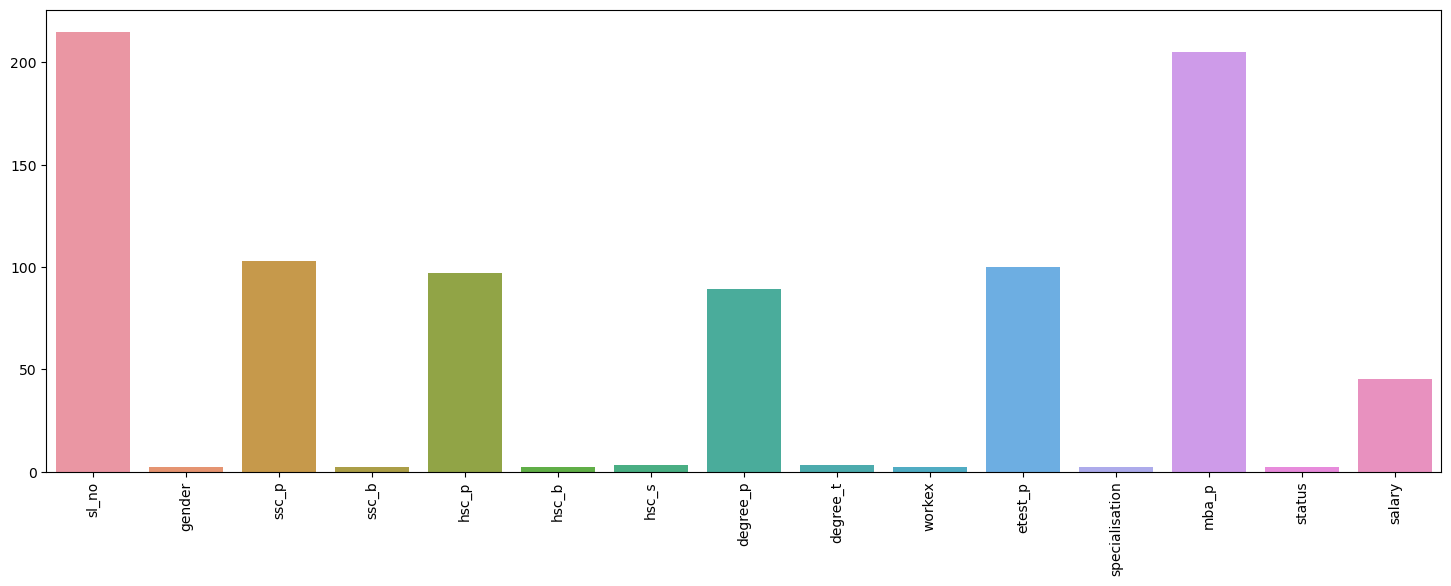

In [17]:
plt.figure(figsize=(18,6))
sns.barplot(x = df.nunique().index,y=df.nunique().values)
plt.xticks(rotation='vertical')
plt.show()

# 4. Data Exploration & Cleaning

# Changing names of columns

In [18]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [19]:
#change Names(rename) of Columns
df.rename(columns={'sl_no':'S.No.', 'gender':'Gender', 'ssc_p':'10th%', 'ssc_b':'10th_board', 'hsc_p':'12th%', 'hsc_b':'12th_board', 
 'hsc_s':'12th_specialization', 'degree_p':'graduation%', 'degree_t':'graduation_deg', 'workex':'Work_experience',
 'etest_p':'Employee_test%', 'specialisation':'MBA_specialization', 'mba_p':'MBA%', 'status':'Placed/Not', 'salary':'Salary'},
          inplace=True)

In [20]:
#New Column names
df.columns

Index(['S.No.', 'Gender', '10th%', '10th_board', '12th%', '12th_board',
       '12th_specialization', 'graduation%', 'graduation_deg',
       'Work_experience', 'Employee_test%', 'MBA_specialization', 'MBA%',
       'Placed/Not', 'Salary'],
      dtype='object')

# Categoriacal & Numerical Features

In [21]:
#Categorical Features
cat_fea=['Gender', '10th_board', '12th_board', '12th_specialization', 'graduation_deg', 'Work_experience', 'MBA_specialization', 'Placed/Not']
#Numerical Features
num_fea=['10th%', '12th%', 'graduation%', 'Employee_test%', 'MBA%', 'Salary']

# Value Counts 

In [22]:
#percent of all categories in categorical feature 
for fea in cat_fea:
    print(f'{fea}\n{(df[fea].value_counts()/df.shape[0])*100}\n')
#Observation-->Imbalanced 'Gender','12th_board','12th_specialization'(Arts),'graduation_deg'(Others),'Work_experience','Placed/Not'
#Observation-->Approximately balanced Data on '10th_board', 'MBA_specialization'

Gender
0    64.651163
1    35.348837
Name: Gender, dtype: float64

10th_board
Central    53.953488
Others     46.046512
Name: 10th_board, dtype: float64

12th_board
Others     60.930233
Central    39.069767
Name: 12th_board, dtype: float64

12th_specialization
Commerce    52.558140
Science     42.325581
Arts         5.116279
Name: 12th_specialization, dtype: float64

graduation_deg
Comm&Mgmt    67.441860
Sci&Tech     27.441860
Others        5.116279
Name: graduation_deg, dtype: float64

Work_experience
No     65.581395
Yes    34.418605
Name: Work_experience, dtype: float64

MBA_specialization
Mkt&Fin    55.813953
Mkt&HR     44.186047
Name: MBA_specialization, dtype: float64

Placed/Not
Placed        68.837209
Not Placed    31.162791
Name: Placed/Not, dtype: float64



# 5. Exploratory Data Analysis (EDA)

# Graphical Analysis

# 1. UNIVARIATE Analysis

# 1.1 Non-Missing values

In [23]:
mis_color = []

for col in df.columns:
    if df[col].isna().sum() != 0:
        mis_color.append('#36FFF5')
    else:
        mis_color.append('gray')

Text(0.5, 1.15, 'Non-Missing Values (BEFORE)')

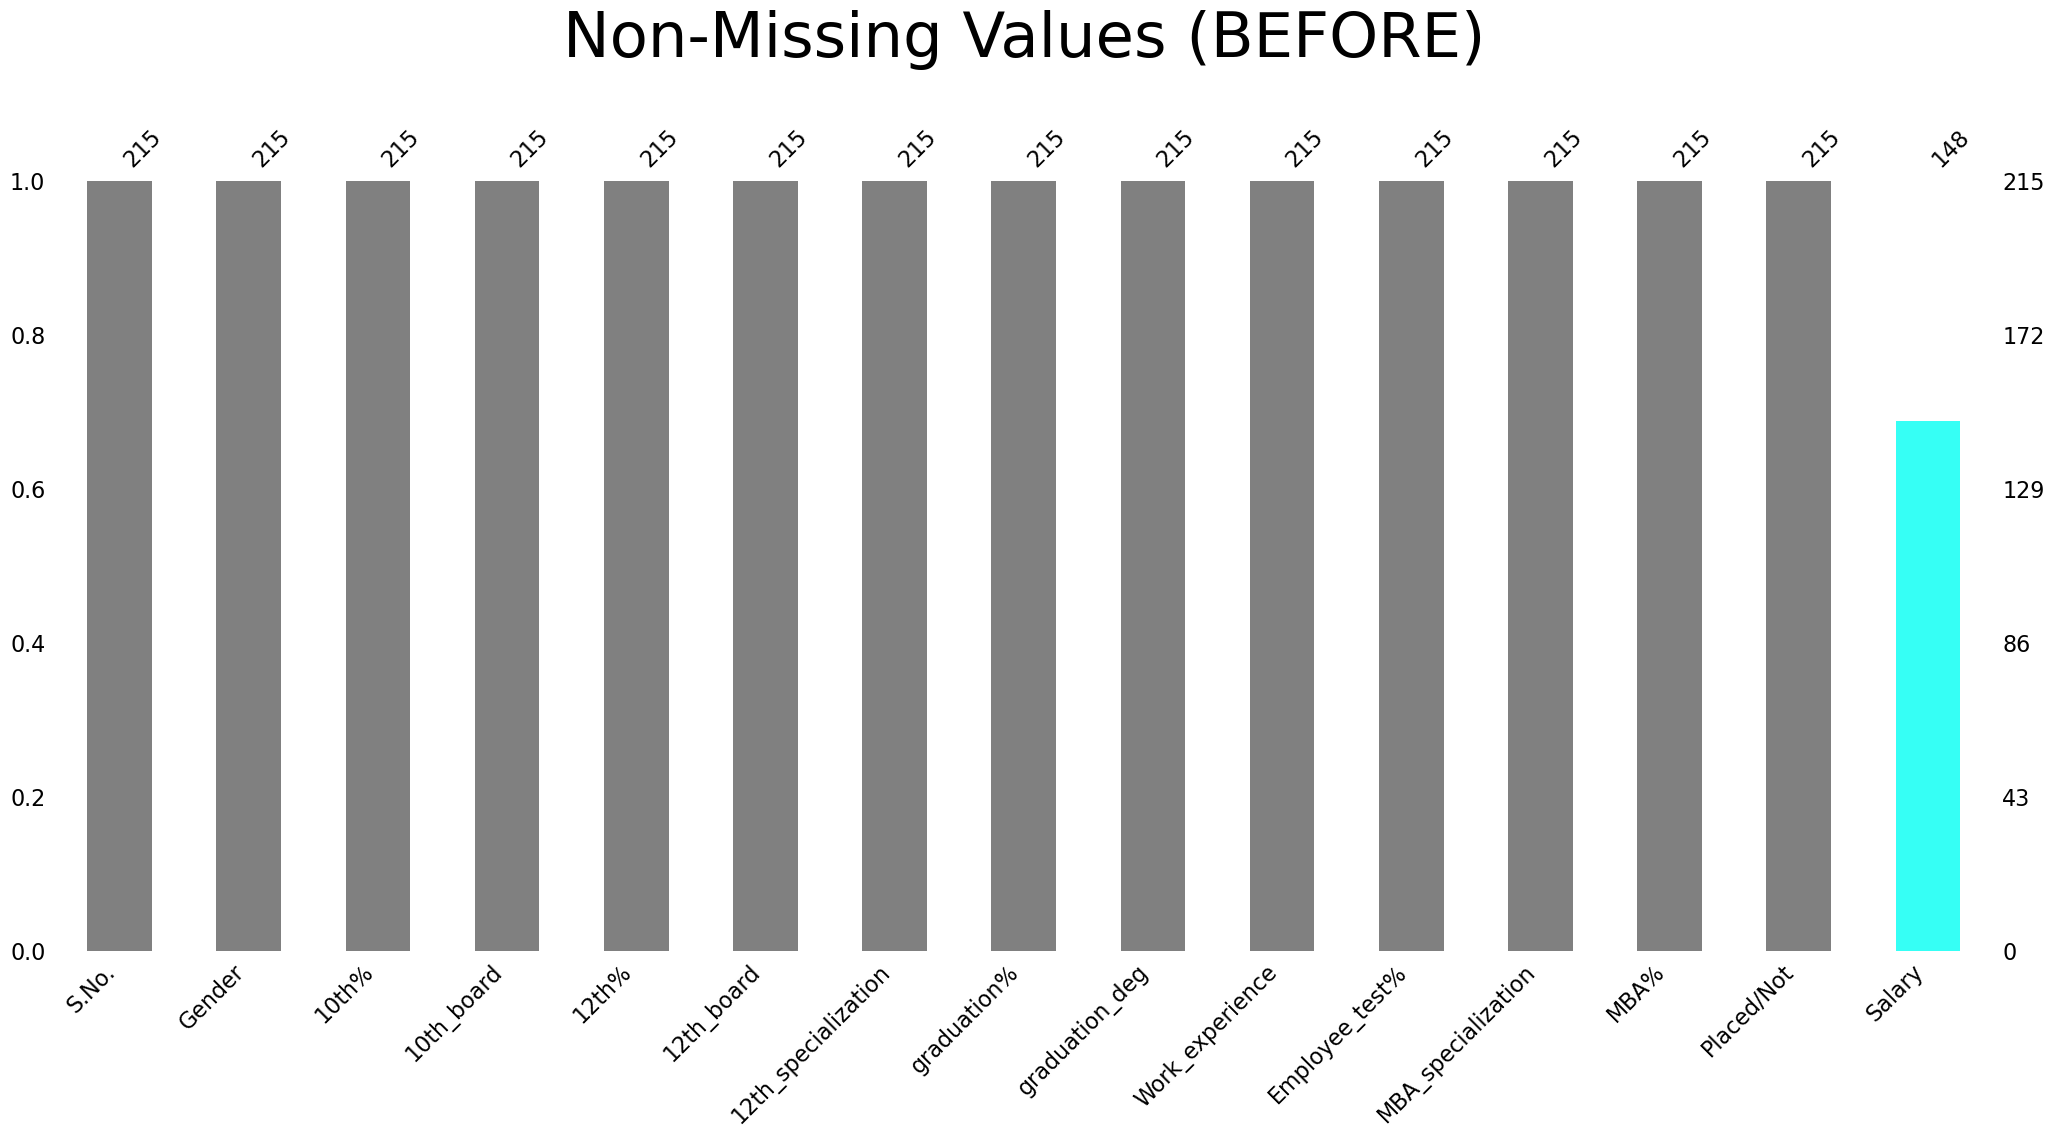

In [24]:
msn.bar(df, color=mis_color)
plt.title('Non-Missing Values (BEFORE)', size=45, y=1.15)
#Observation-->Some missing values in 'Salary'

# 1.2 Salary Distribution(Kernel Density Estimator - KDE Plot)

Text(0, 0.5, 'probability Density')

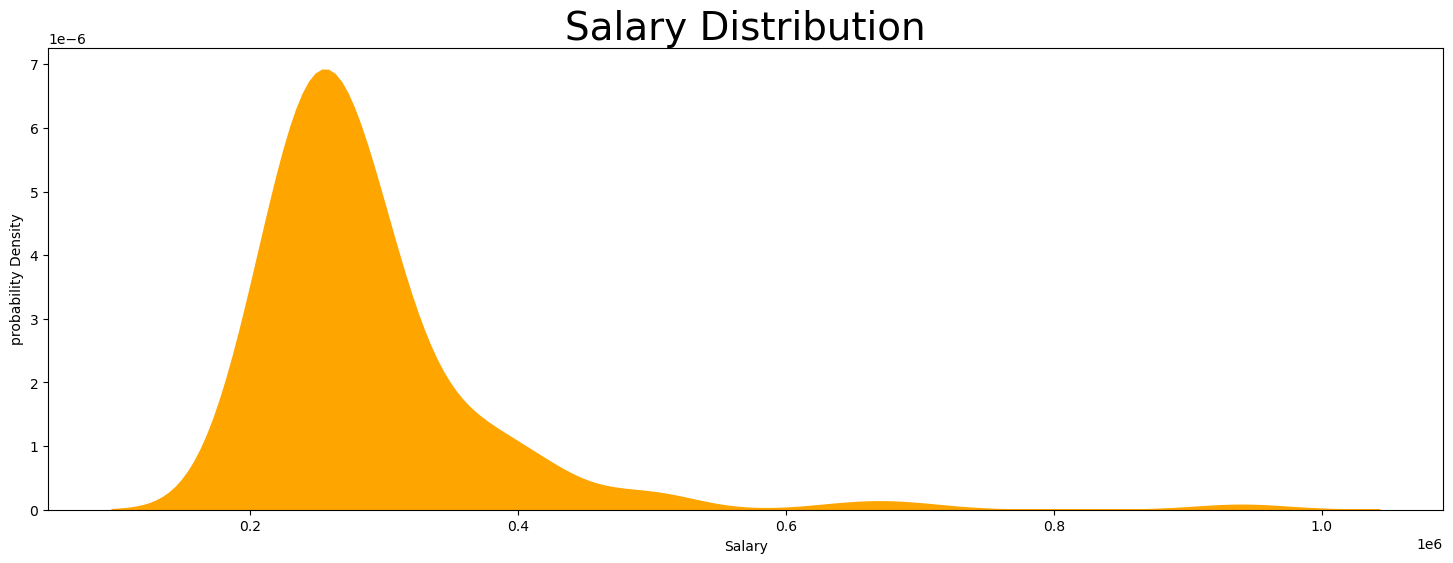

In [25]:
fig = plt.figure(figsize=(18, 6))
# ax = fig.add_subplot(111)
plt.title('Salary Distribution', size=28)

# Since there are many NaN values in Salary feature, so Data without NaN values in salary column
temp_df = df.copy()
temp_df = temp_df.dropna()

# plots
sns.kdeplot(data=temp_df,x='Salary', shade=True, color='orange', alpha=1)
plt.xlabel('Salary')
plt.ylabel('probability Density')

#Observation-->We have Right Skewed distribution. It’s worth noting that we don’t have much data

In [26]:
#Most frequent Salary
temp_df['Salary'].mode().iloc[0]

300000.0

# 1.3 Placed/Not ratio

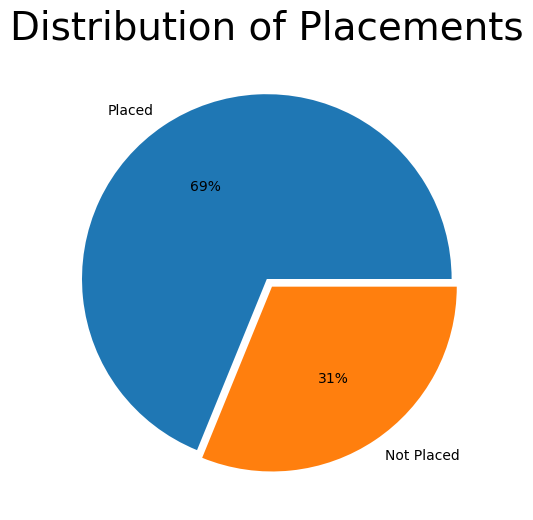

Placed        148
Not Placed     67
Name: Placed/Not, dtype: int64


In [27]:
# pie chart for Placed/Not

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Distribution of Placements', size=28)

explode = [0, 0.05]
values=df['Placed/Not'].value_counts()
labels=df['Placed/Not'].unique().tolist()
plt.pie(values, labels=labels, explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()
print(values)

# 1.4 Gender ratio

<AxesSubplot:xlabel='Gender', ylabel='count'>

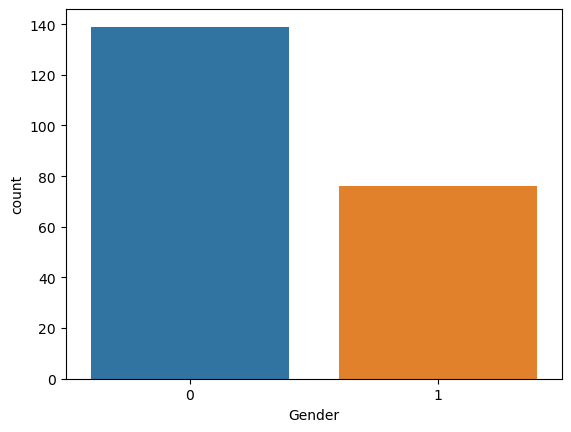

In [28]:
sns.countplot(x='Gender',data=df)

# 2. BIVARIATE Analysis

# 2.1 Salary Vs Placement

In [29]:
#Status of Placed/Not wrt NaN Salary
df[['Placed/Not', 'Salary']][np.isnan(df.Salary)]

,Placed/Not,Salary
3,Not Placed,NaN
5,Not Placed,NaN
6,Not Placed,NaN
9,Not Placed,NaN
12,Not Placed,NaN
...,...,...
198,Not Placed,NaN
201,Not Placed,NaN
206,Not Placed,NaN
208,Not Placed,NaN


# **If we look at Salary of students Not got placed, it becomes clearer that all the students who haven't got Placed have 0 salary**

**In this case, we can replace the missing values with a variable of "0", but then we will have a direct link with the predicted status, so you should delete this column¶**

In [30]:
#drop Salary and S.No.(as its of no use)
df=df.drop(['Salary', 'S.No.'], axis=1)
#sample row of df
df.sample()

,Gender,10th%,10th_board,12th%,12th_board,12th_specialization,graduation%,graduation_deg,Work_experience,Employee_test%,MBA_specialization,MBA%,Placed/Not
20,0,62.0,Others,65.0,Others,Commerce,66.0,Comm&Mgmt,No,50.0,Mkt&HR,56.7,Placed


In [31]:
df.columns

Index(['Gender', '10th%', '10th_board', '12th%', '12th_board',
       '12th_specialization', 'graduation%', 'graduation_deg',
       'Work_experience', 'Employee_test%', 'MBA_specialization', 'MBA%',
       'Placed/Not'],
      dtype='object')

# 2.2 Gender influence on Placement

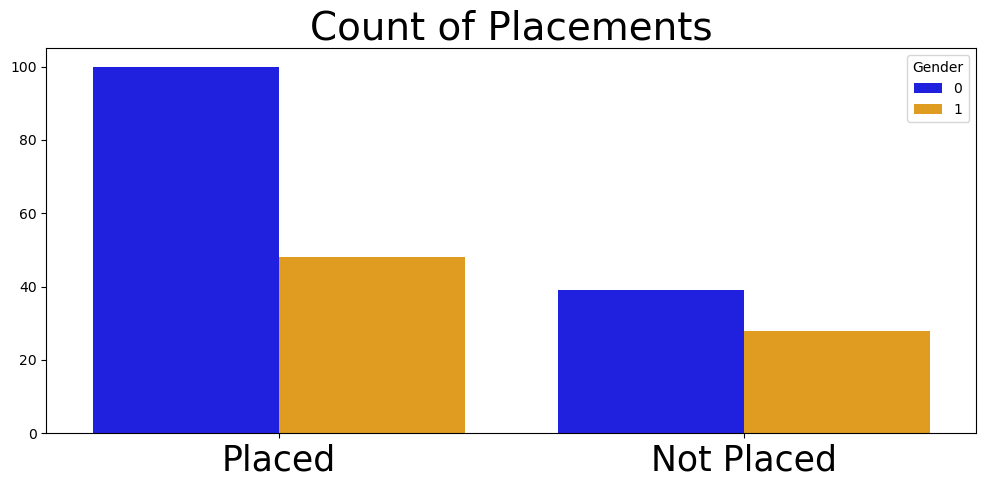

In [32]:
##TRY TO PLOT CATPLOT FOr SEEING INFLUENCE 
    
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
plt.title('Count of Placements', size=28)

sns.countplot(x='Placed/Not',data=df,hue='Gender', palette=['blue', 'orange'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Placed', 'Not Placed'], size=25)
plt.show()

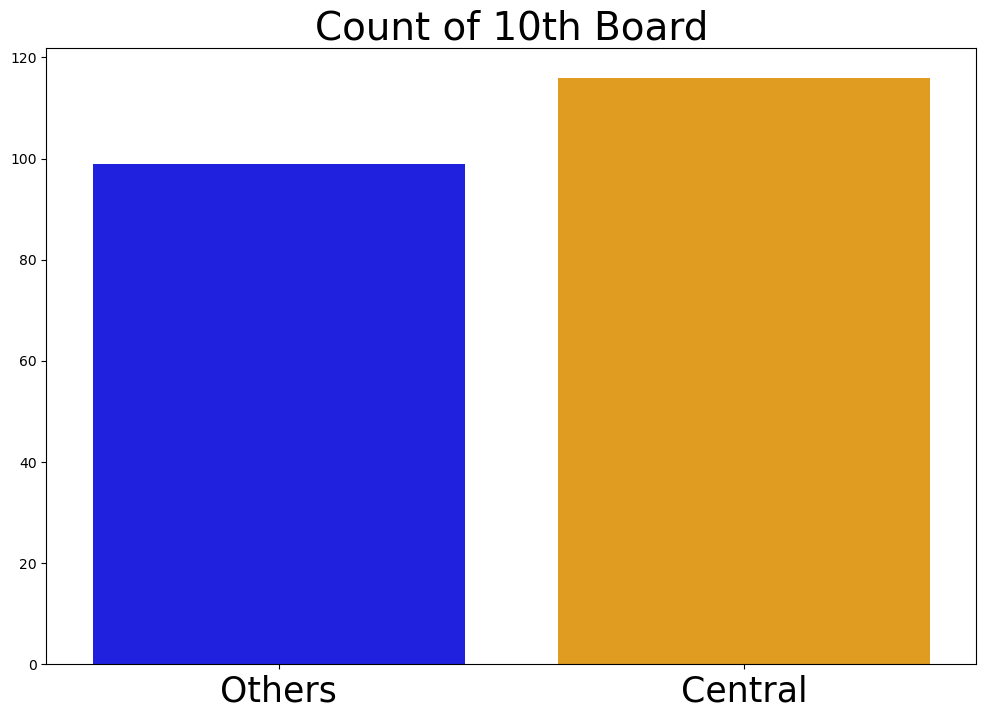

In [33]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Count of 10th Board', size=28)

sns.countplot(x='10th_board',data=df, palette=['blue', 'orange'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Others', 'Central'], size=25)
plt.show()

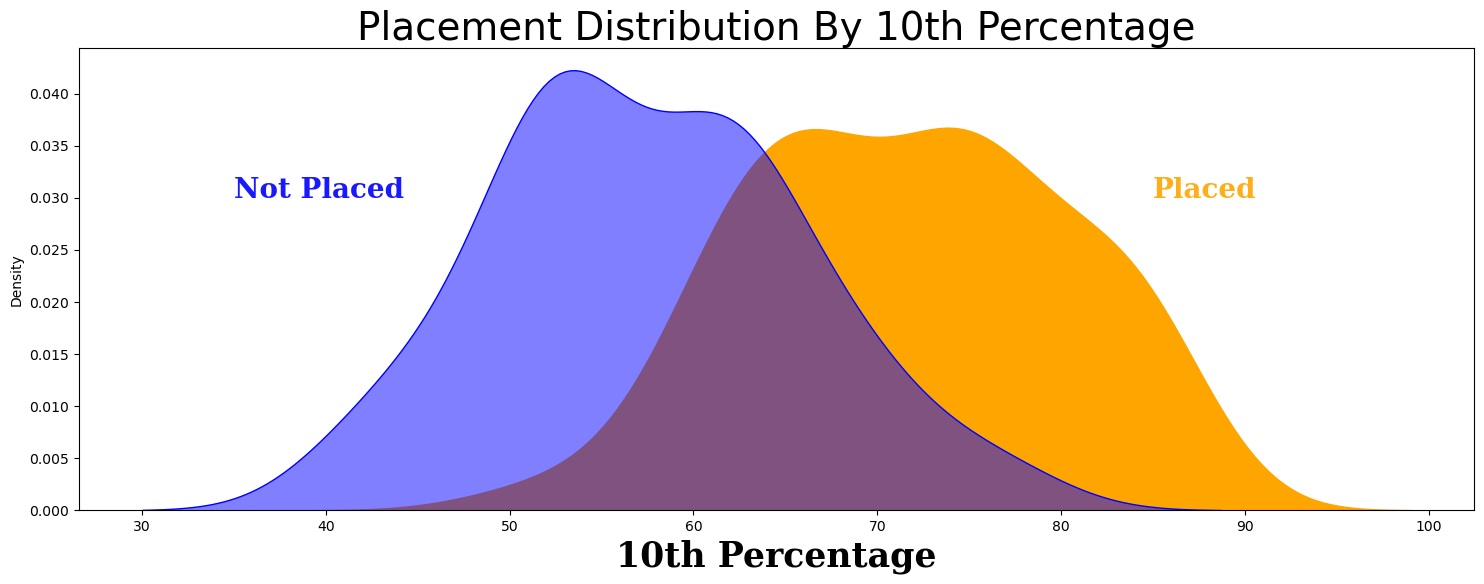

In [34]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Placement Distribution By 10th Percentage', size=28)

ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['Placed/Not']=='Placed'], x='10th%', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['Placed/Not']!='Placed'], x='10th%', shade=True, ax=ax, color='blue', alpha=0.5)

plt.xlabel("10th Percentage", {'fontproperties': 'Serif','size': '25','weight': 'bold'})
plt.show()

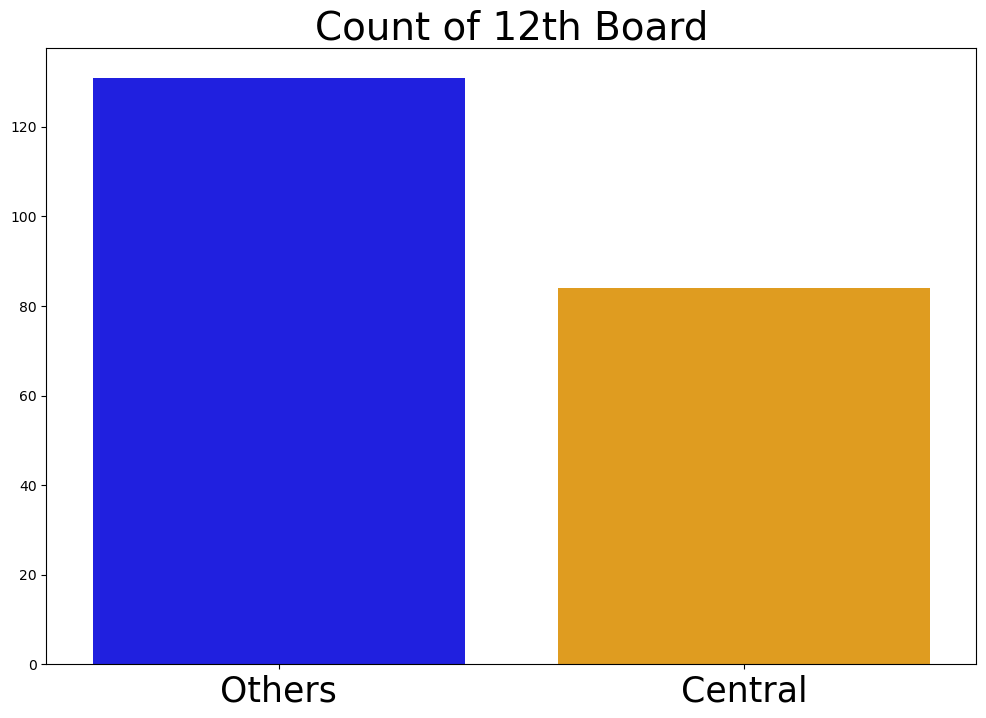

In [35]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Count of 12th Board', size=28)

sns.countplot(x='12th_board',data=df, palette=['blue', 'orange'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Others', 'Central'], size=25)
plt.show()

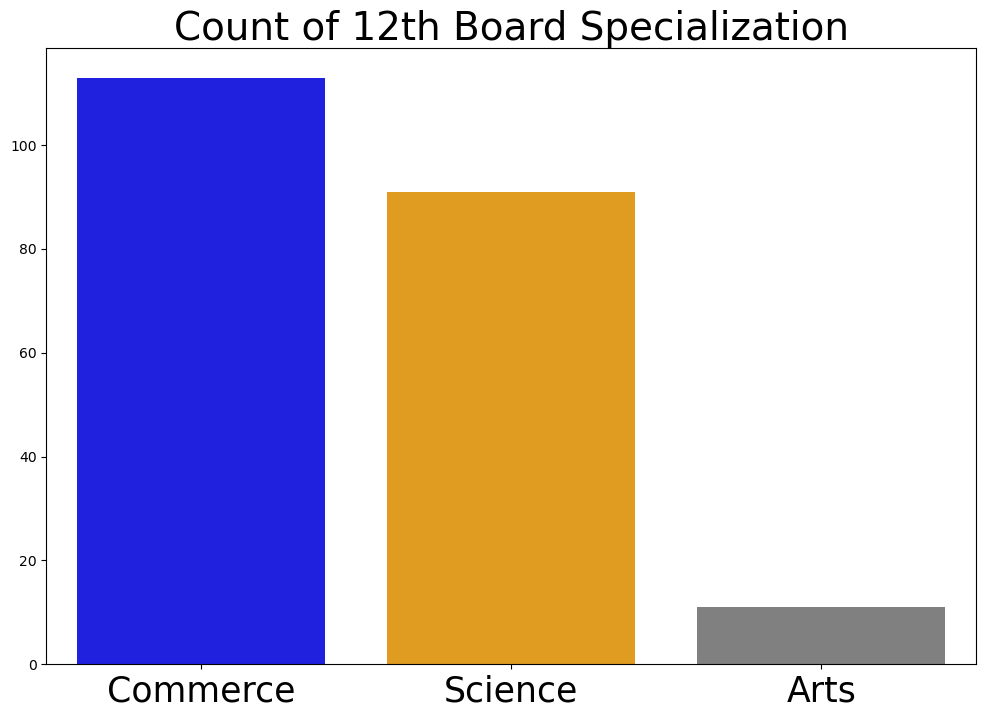

In [36]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Count of 12th Board Specialization', size=28)

sns.countplot(x='12th_specialization',data=df, palette=['blue', 'orange', 'gray'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Commerce', 'Science', 'Arts'], size=25)
plt.show()

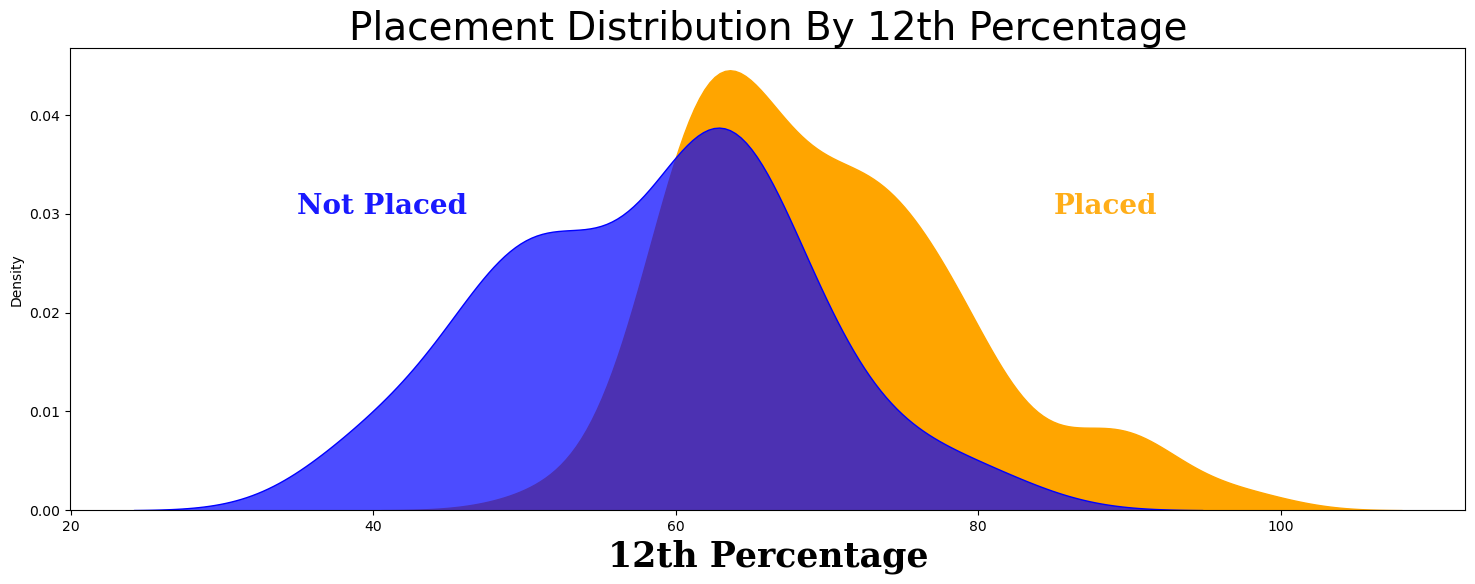

In [37]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Placement Distribution By 12th Percentage', size=28)

ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['Placed/Not']=='Placed'], x='12th%', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['Placed/Not']!='Placed'], x='12th%', shade=True, ax=ax, color='blue', alpha=0.7)
plt.xlabel("12th Percentage", {'fontproperties': 'Serif','size': '25','weight': 'bold'})

plt.show()

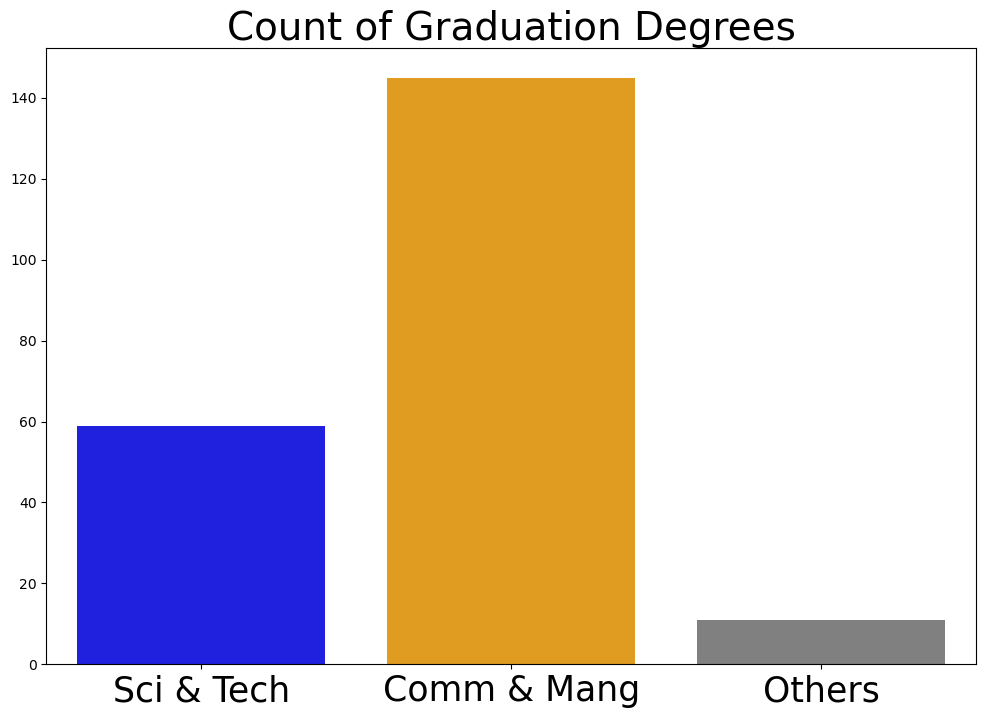

In [38]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Count of Graduation Degrees', size=28)

sns.countplot(x='graduation_deg',data=df, palette=['blue', 'orange', 'gray'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Sci & Tech', 'Comm & Mang', 'Others'], size=25)
plt.show()

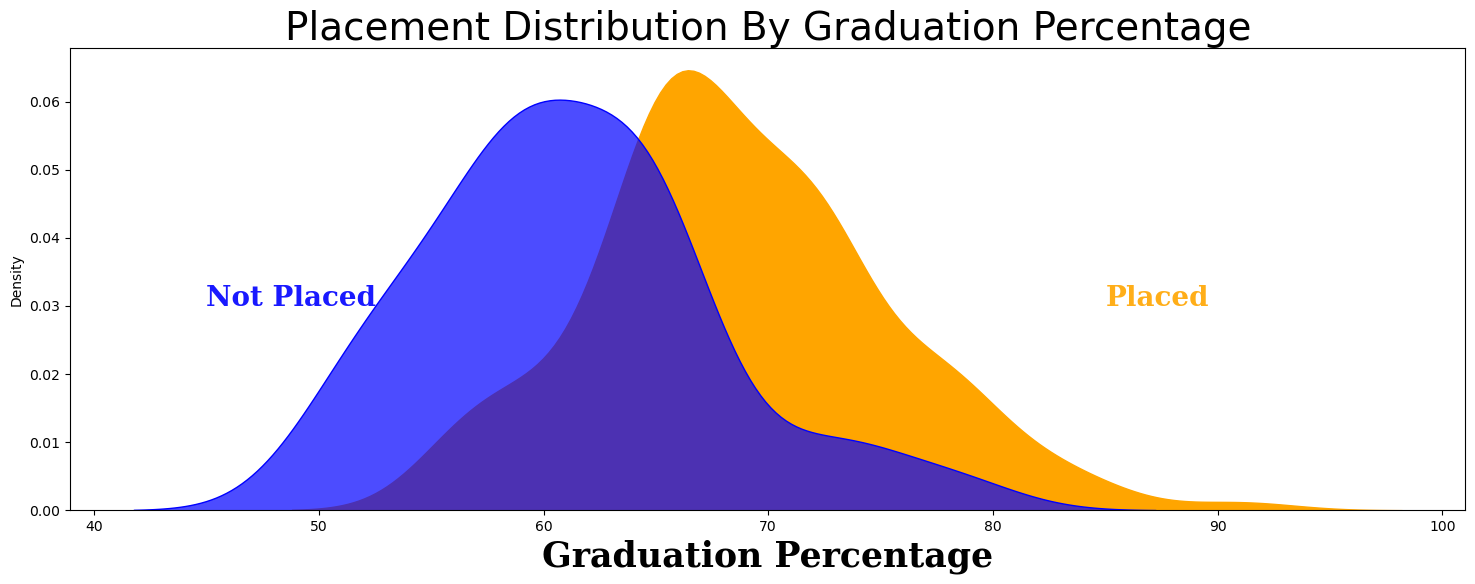

In [39]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Placement Distribution By Graduation Percentage', size=28)

ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(45, 0.03, 'Not Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['Placed/Not']=='Placed'], x='graduation%', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['Placed/Not']!='Placed'], x='graduation%', shade=True, ax=ax, color='blue', alpha=0.7)
plt.xlabel("Graduation Percentage", {'fontproperties': 'Serif','size': '25','weight': 'bold'})

plt.show()

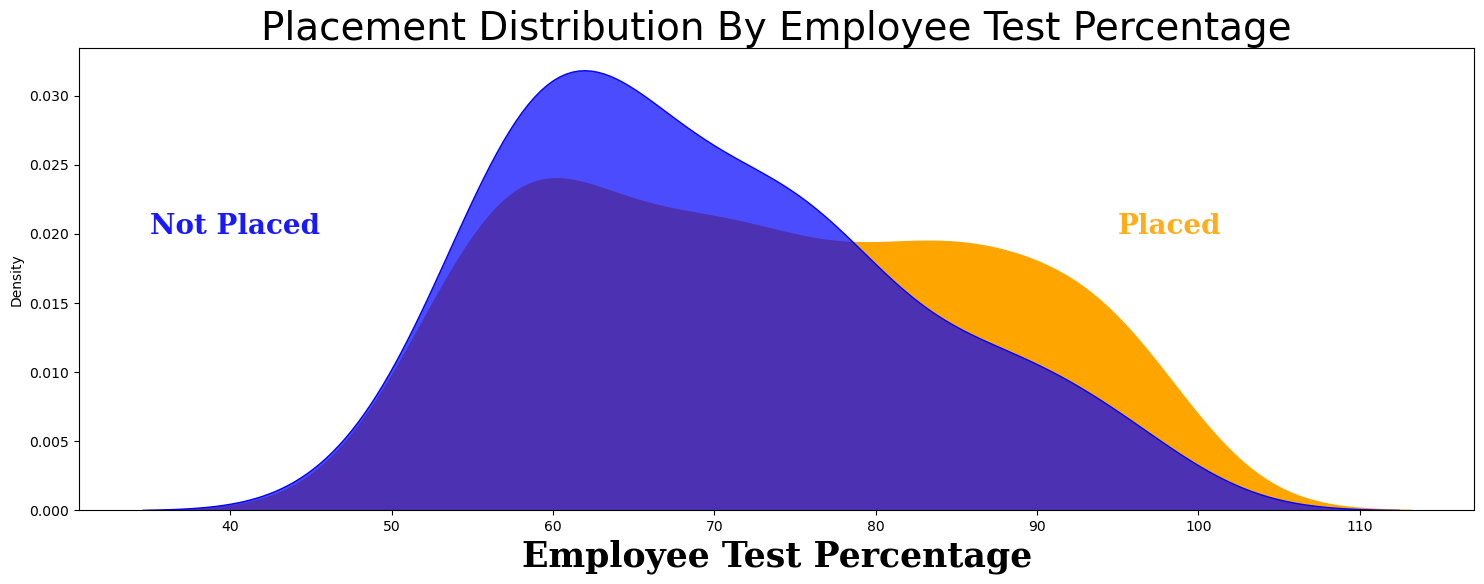

In [40]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Placement Distribution By Employee Test Percentage', size=28)

ax.text(95, 0.02, 'Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(35, 0.02, 'Not Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['Placed/Not']=='Placed'], x='Employee_test%', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['Placed/Not']!='Placed'], x='Employee_test%', shade=True, ax=ax, color='blue', alpha=0.7)
plt.xlabel("Employee Test Percentage", {'fontproperties': 'Serif','size': '25','weight': 'bold'})

plt.show()

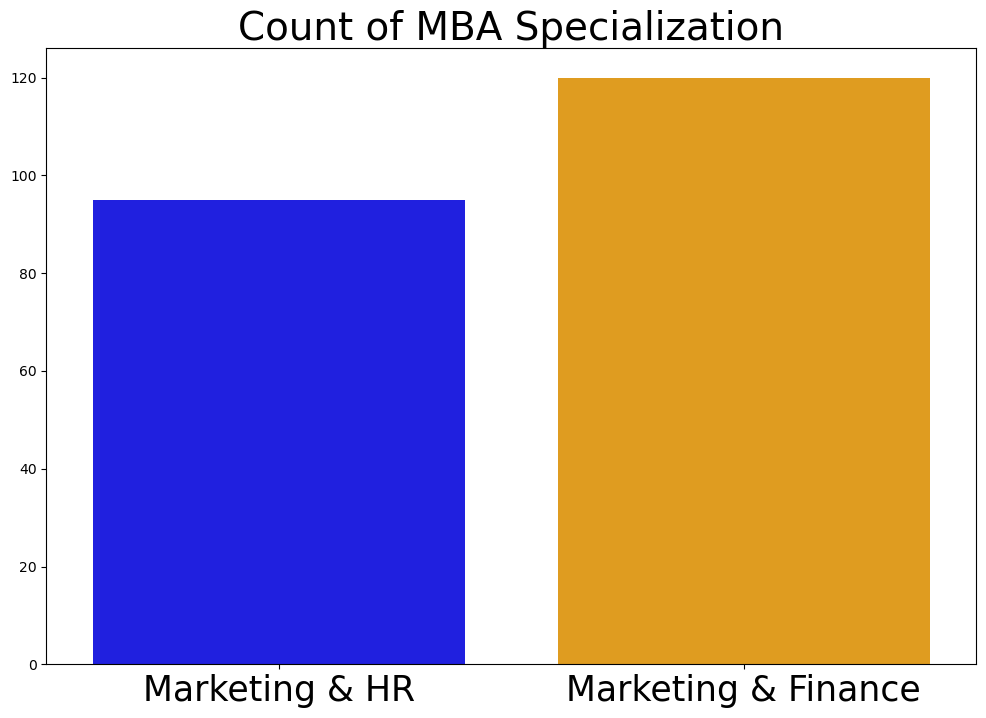

In [41]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Count of MBA Specialization', size=28)

sns.countplot(x='MBA_specialization',data=df, palette=['blue', 'orange'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Marketing & HR', 'Marketing & Finance'], size=25)
plt.show()

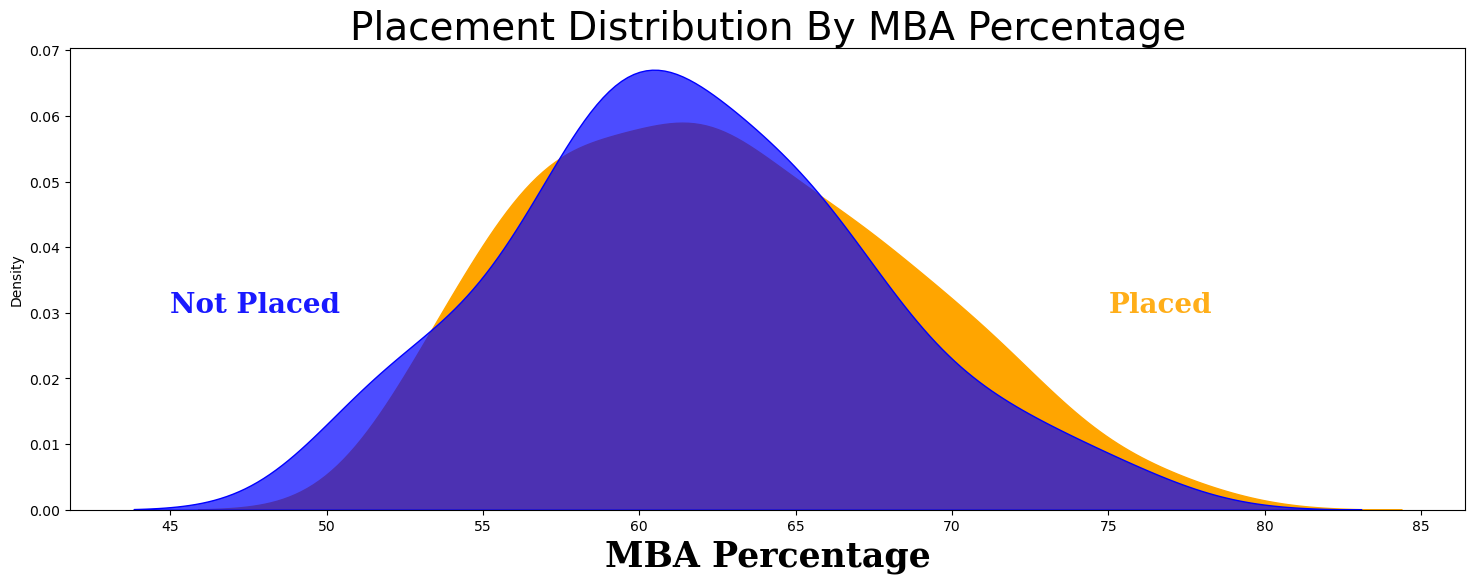

In [42]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Placement Distribution By MBA Percentage', size=28)

ax.text(75, 0.03, 'Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(45, 0.03, 'Not Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['Placed/Not']=='Placed'], x='MBA%', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['Placed/Not']!='Placed'], x='MBA%', shade=True, ax=ax, color='blue', alpha=0.7)
plt.xlabel("MBA Percentage", {'fontproperties': 'Serif','size': '25','weight': 'bold'})

plt.show()

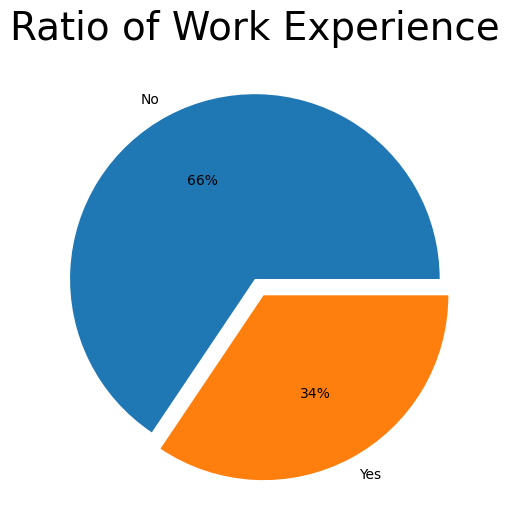

No     141
Yes     74
Name: Work_experience, dtype: int64


In [43]:
# pie chart for Work Experience

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Ratio of Work Experience', size=28)

explode = [0, 0.1]
values=df['Work_experience'].value_counts()
labels=df['Work_experience'].unique().tolist()
plt.pie(values, labels=labels, explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()
print(values)

# 3. Multivariate Analysis

# 3.1 Pairplot(relation of all the features with all others)

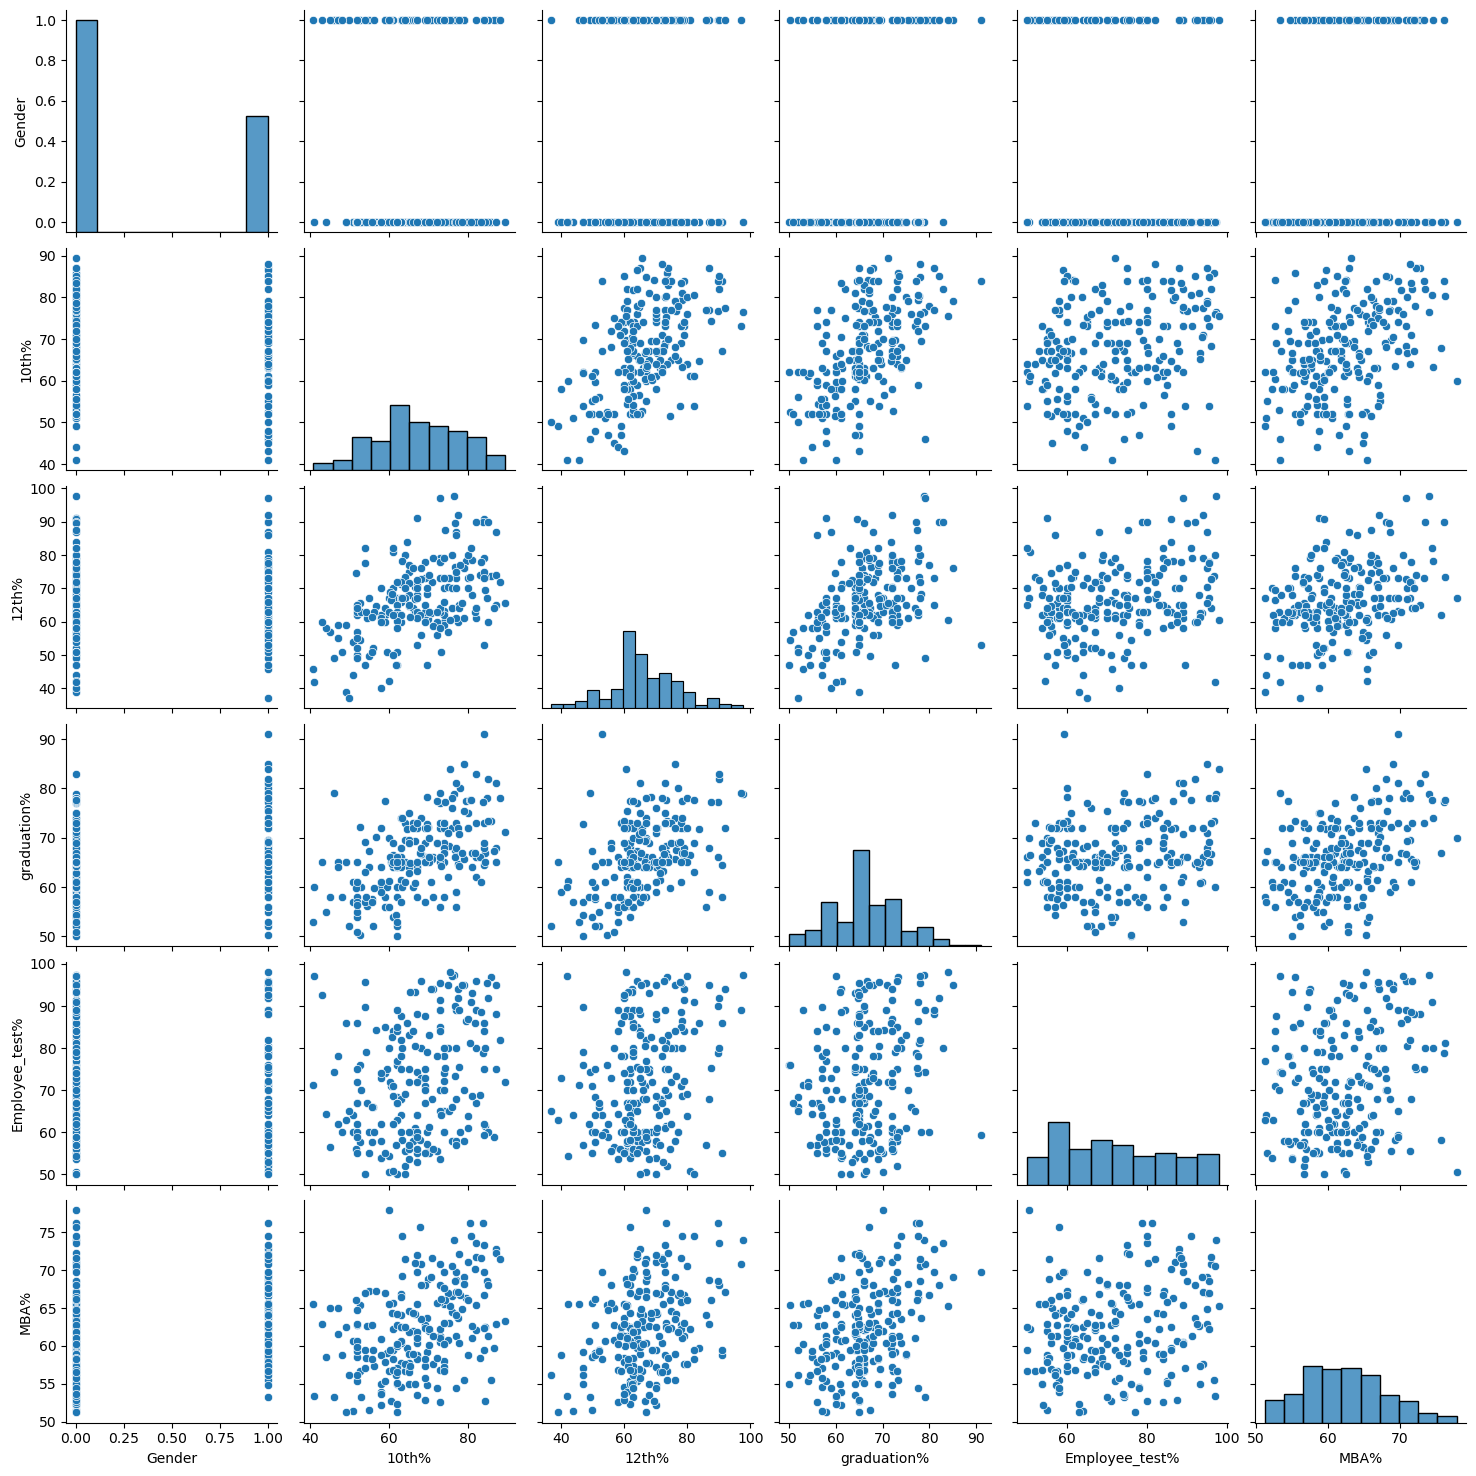

In [44]:
#all with with
sns.pairplot(df)

# 6. Feature Engineering / Preprocessing

# 6.1 Feature Encoding(for categorical features)

In [45]:
cat_fea

['Gender',
 '10th_board',
 '12th_board',
 '12th_specialization',
 'graduation_deg',
 'Work_experience',
 'MBA_specialization',
 'Placed/Not']

In [46]:
#Male-1, Female-0
# df.Gender = df.Gender.map({'M': 1, 'F': 0})

In [47]:
#'Placed': 1, 'Not Placed': 0
df['Placed/Not'] = df['Placed/Not'].map({'Placed': 1, 'Not Placed': 0})

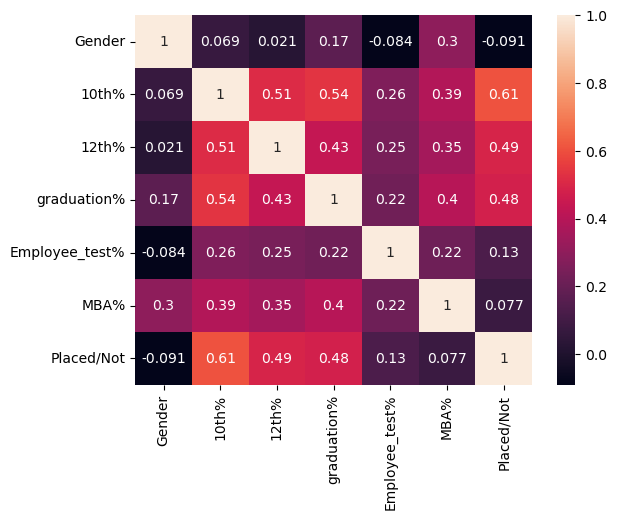

In [48]:
# correlation chart
sns.heatmap(df.corr(),annot=True)
plt.show()

In [49]:
df.head()

,Gender,10th%,10th_board,12th%,12th_board,12th_specialization,graduation%,graduation_deg,Work_experience,Employee_test%,MBA_specialization,MBA%,Placed/Not
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


In [50]:
# as we can see, MBA% is not that much 
#correlated with our data we are going to drop it
df.drop("MBA%",axis=1,inplace=True)

In [51]:
#Encoding into numerical values
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in df.columns:
 if isinstance(df[i][0], str):
    df[i] = encoder.fit_transform(df[i])


In [52]:
df.head()

,Gender,10th%,10th_board,12th%,12th_board,12th_specialization,graduation%,graduation_deg,Work_experience,Employee_test%,MBA_specialization,Placed/Not
0,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,1
1,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,1
2,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,1
3,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,0
4,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,1


In [53]:
# extract x and y
X = df.drop('Placed/Not',axis=1)
y = df['Placed/Not']

In [54]:
# train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8,stratify=y)

In [55]:
# shape of train and test
X_train.shape,X_test.shape

((172, 11), (43, 11))

In [56]:
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

model_list = [("Logistic Regression",LogisticRegression()),("Decision Tree",DecisionTreeClassifier()),("Random Forest",RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=30)),("AdaBoost",AdaBoostClassifier()),
              ("Support Vector Machine",SVC()),("Bernoulli Naive Bayes",BernoulliNB()),("Naive Bayes",GaussianNB())]


# accuracy score on test dataset for all models  
for model_name,model in model_list:
    m = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'{model_name} : {accuracy_score(y_test,y_pred)*100} %')

Logistic Regression : 79.06976744186046 %
Decision Tree : 83.72093023255815 %
Random Forest : 90.69767441860465 %
AdaBoost : 81.3953488372093 %
Support Vector Machine : 83.72093023255815 %
Bernoulli Naive Bayes : 69.76744186046511 %
Naive Bayes : 93.02325581395348 %


C:\m_pf\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


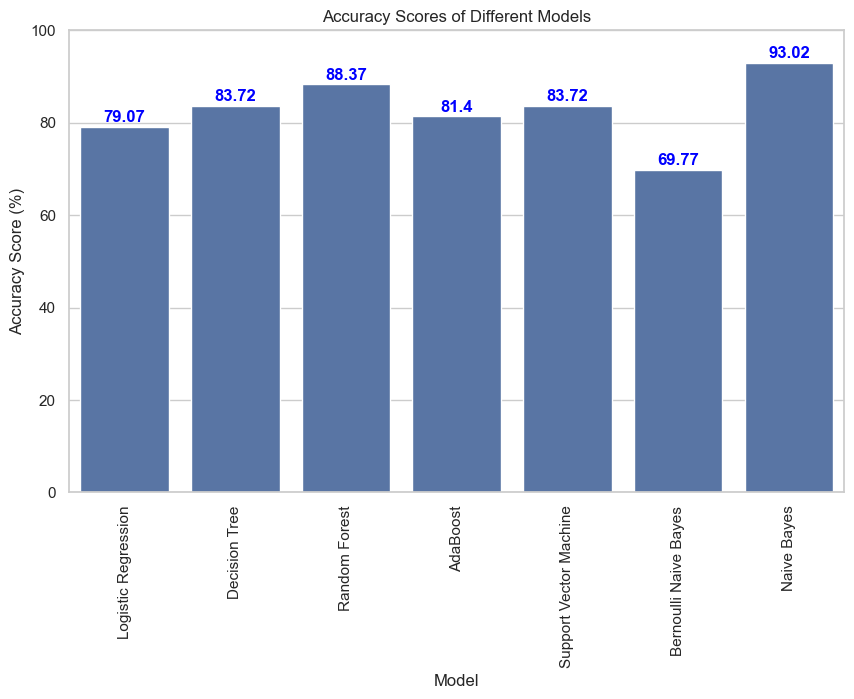

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with the accuracy scores
accuracy_scores = {
    'Logistic Regression': 79.06976744186046,
    'Decision Tree': 83.72093023255815,
    'Random Forest': 88.37209302325581,
    'AdaBoost': 81.3953488372093,
    'Support Vector Machine': 83.72093023255815,
    'Bernoulli Naive Bayes': 69.76744186046511,
    'Naive Bayes': 93.02325581395348
}

# Create a bar plot with Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), color='b')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score (%)')
plt.ylim(0, 100)
for i, v in enumerate(list(accuracy_scores.values())):
    ax.text(i, v + 1, str(round(v, 2)), color='blue', fontweight='bold', ha='center')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


# After Analysis, I found that Naive Bayes is giving us better result than all other models. So, we are gonna use Naive Bayes for Training. 

# Model Evaluation : Naive Bayes

In [58]:
classifierNB = GaussianNB()
classifierNB.fit(X_train,y_train)

GaussianNB()

In [59]:
# classification report like precision, recall, f1-score  of our model
from sklearn import metrics

y_predict=classifierNB.predict(X_test)
print("Model accuracy:",accuracy_score(y_test, y_predict)*100,"%")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


Model accuracy: 93.02325581395348 %
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.94      0.97      0.95        30

    accuracy                           0.93        43
   macro avg       0.93      0.91      0.92        43
weighted avg       0.93      0.93      0.93        43



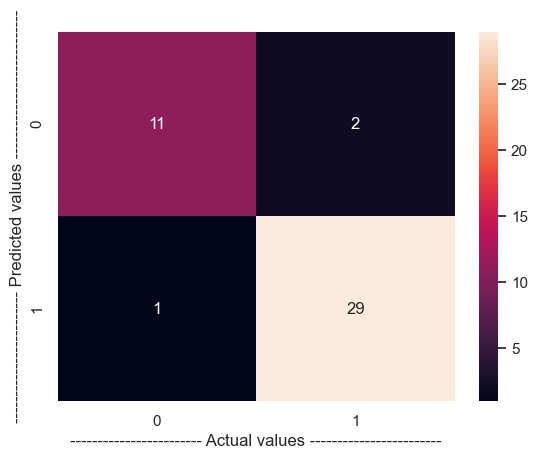

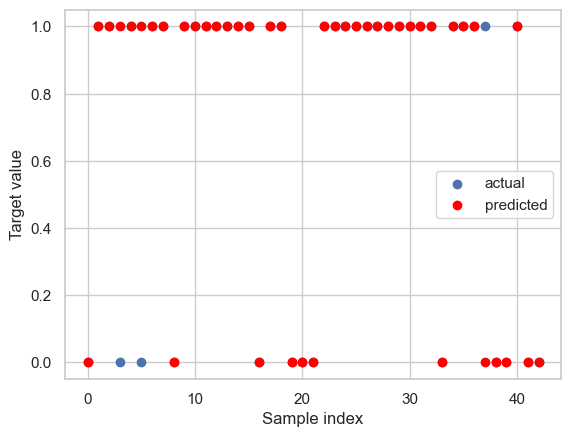

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('------------------------ Actual values ------------------------')
plt.ylabel('------------------------ Predicted values ---------------------------')

plt.show()

plt.scatter(range(len(y_test)), y_test, label='actual')
plt.scatter(range(len(y_pred)), y_pred, label='predicted',c='red')
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend()
plt.show()

## Models

# LogisticRegression

C:\m_pf\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy: 79.06976744186046 %
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.89      0.80      0.84        30

    accuracy                           0.79        43
   macro avg       0.76      0.78      0.77        43
weighted avg       0.81      0.79      0.80        43



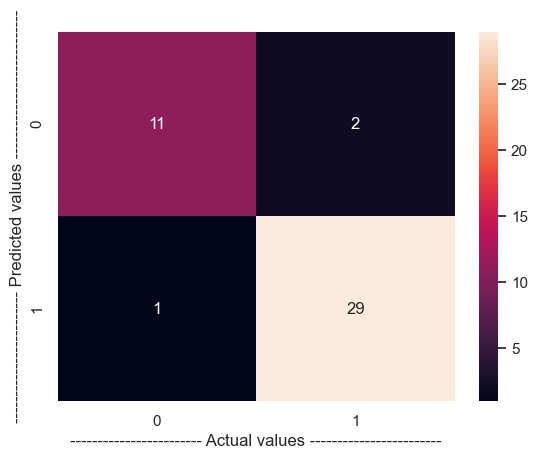

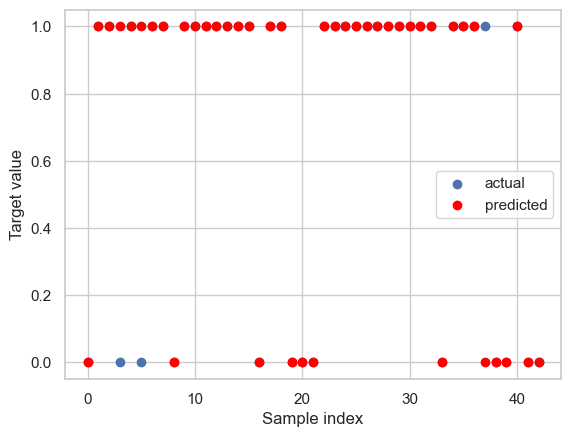

In [61]:
classifierlr = LogisticRegression()
classifierlr.fit(X_train,y_train)

# classification report like precision, recall, f1-score  of our model
from sklearn import metrics

y_predict=classifierlr.predict(X_test)
print("Model accuracy:",accuracy_score(y_test, y_predict)*100,"%")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('------------------------ Actual values ------------------------')
plt.ylabel('------------------------ Predicted values ---------------------------')

plt.show()

plt.scatter(range(len(y_test)), y_test, label='actual')
plt.scatter(range(len(y_pred)), y_pred, label='predicted',c='red')
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend()
plt.show()

# Decision Tree

Model accuracy: 81.3953488372093 %
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.82      0.93      0.87        30

    accuracy                           0.81        43
   macro avg       0.80      0.74      0.76        43
weighted avg       0.81      0.81      0.80        43



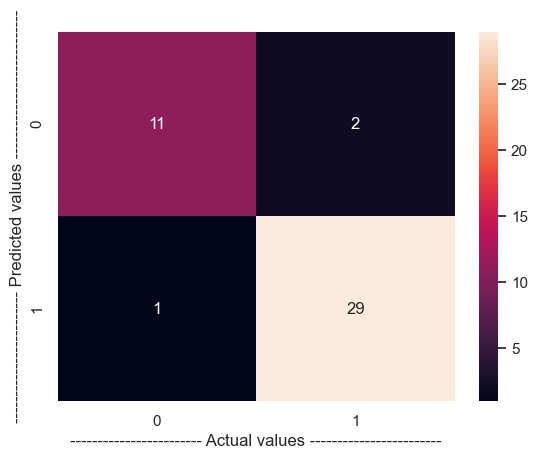

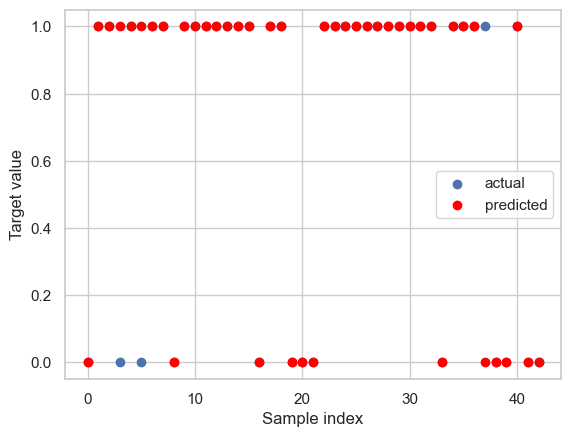

In [62]:
classifierdt = DecisionTreeClassifier()
classifierdt.fit(X_train,y_train)

# classification report like precision, recall, f1-score  of our model
from sklearn import metrics

y_predict=classifierdt.predict(X_test)
print("Model accuracy:",accuracy_score(y_test, y_predict)*100,"%")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('------------------------ Actual values ------------------------')
plt.ylabel('------------------------ Predicted values ---------------------------')

plt.show()

plt.scatter(range(len(y_test)), y_test, label='actual')
plt.scatter(range(len(y_pred)), y_pred, label='predicted',c='red')
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend()
plt.show()


# Random Forest

Model accuracy: 86.04651162790698 %
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.90      0.90      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



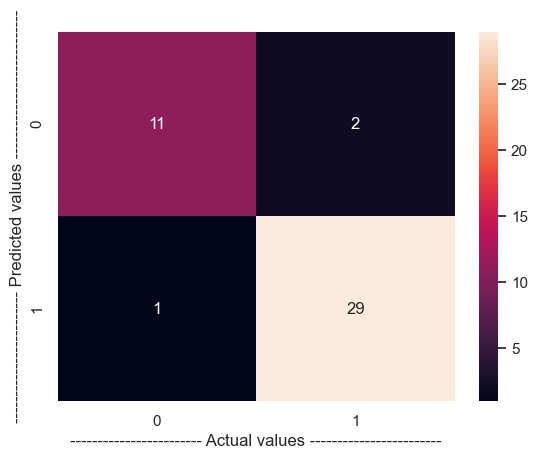

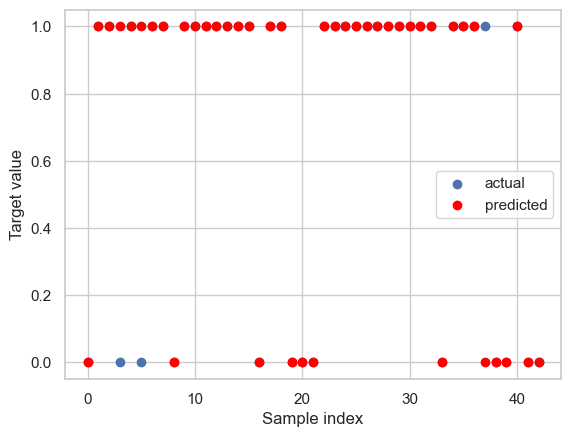

In [63]:
classifierrf = RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=30)
classifierrf.fit(X_train,y_train)

# classification report like precision, recall, f1-score  of our model
from sklearn import metrics

y_predict=classifierrf.predict(X_test)
print("Model accuracy:",accuracy_score(y_test, y_predict)*100,"%")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('------------------------ Actual values ------------------------')
plt.ylabel('------------------------ Predicted values ---------------------------')

plt.show()

plt.scatter(range(len(y_test)), y_test, label='actual')
plt.scatter(range(len(y_pred)), y_pred, label='predicted',c='red')
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend()
plt.show()

# AdaBoost

Model accuracy: 81.3953488372093 %
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.84      0.90      0.87        30

    accuracy                           0.81        43
   macro avg       0.79      0.76      0.77        43
weighted avg       0.81      0.81      0.81        43



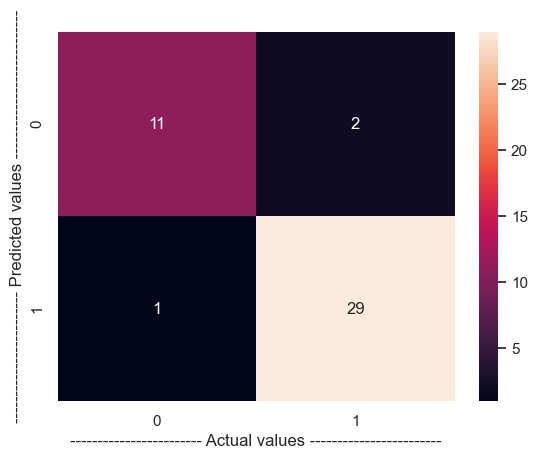

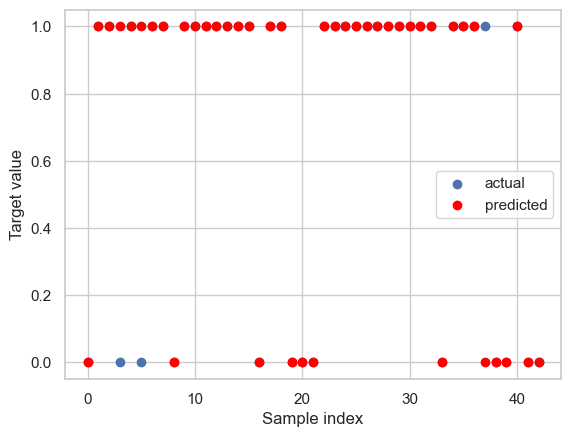

In [64]:
classifierab = AdaBoostClassifier()
classifierab.fit(X_train,y_train)

# classification report like precision, recall, f1-score  of our model
from sklearn import metrics

y_predict=classifierab.predict(X_test)
print("Model accuracy:",accuracy_score(y_test, y_predict)*100,"%")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('------------------------ Actual values ------------------------')
plt.ylabel('------------------------ Predicted values ---------------------------')

plt.show()

plt.scatter(range(len(y_test)), y_test, label='actual')
plt.scatter(range(len(y_pred)), y_pred, label='predicted',c='red')
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend()
plt.show()

# Support Vector Machine

Model accuracy: 83.72093023255815 %
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.83      0.97      0.89        30

    accuracy                           0.84        43
   macro avg       0.85      0.75      0.78        43
weighted avg       0.84      0.84      0.82        43



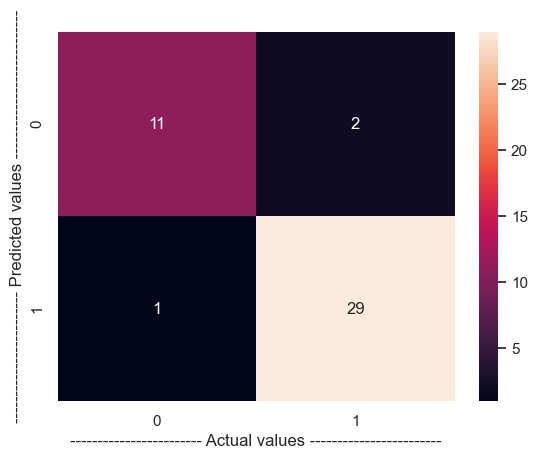

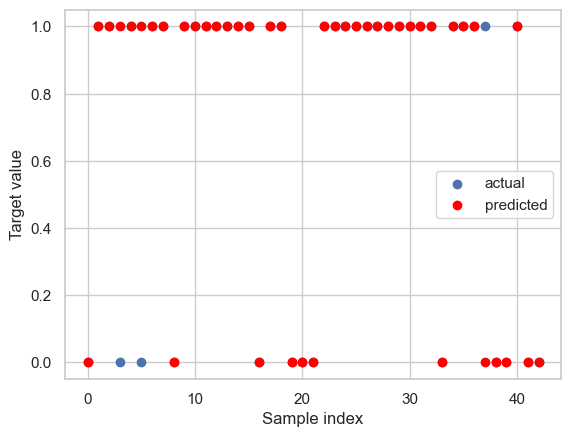

In [65]:
classifiersvm = SVC()
classifiersvm.fit(X_train,y_train)

# classification report like precision, recall, f1-score  of our model
from sklearn import metrics

y_predict=classifiersvm.predict(X_test)
print("Model accuracy:",accuracy_score(y_test, y_predict)*100,"%")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('------------------------ Actual values ------------------------')
plt.ylabel('------------------------ Predicted values ---------------------------')

plt.show()

plt.scatter(range(len(y_test)), y_test, label='actual')
plt.scatter(range(len(y_pred)), y_pred, label='predicted',c='red')
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend()
plt.show()

# Bernoulli Nave Bayes

Model accuracy: 69.76744186046511 %
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.77      0.80      0.79        30

    accuracy                           0.70        43
   macro avg       0.64      0.63      0.63        43
weighted avg       0.69      0.70      0.69        43



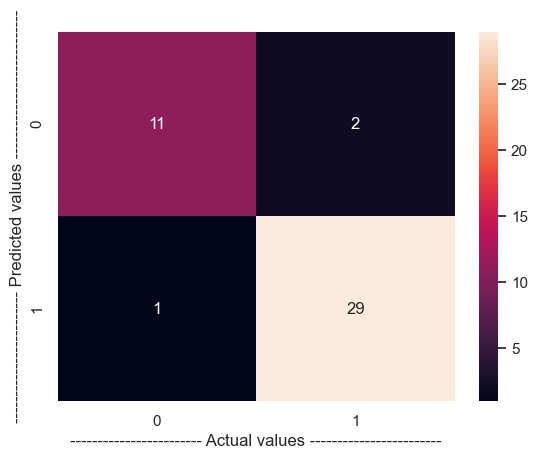

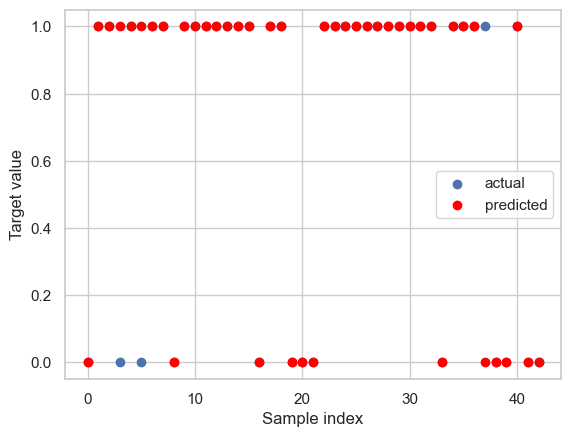

In [66]:
classifierbnb = BernoulliNB()
classifierbnb.fit(X_train,y_train)

# classification report like precision, recall, f1-score  of our model
from sklearn import metrics

y_predict=classifierbnb.predict(X_test)
print("Model accuracy:",accuracy_score(y_test, y_predict)*100,"%")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('------------------------ Actual values ------------------------')
plt.ylabel('------------------------ Predicted values ---------------------------')

plt.show()

plt.scatter(range(len(y_test)), y_test, label='actual')
plt.scatter(range(len(y_pred)), y_pred, label='predicted',c='red')
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend()
plt.show()

In [67]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load data and split into training and test sets
data = df
X = df.drop('Placed/Not',axis=1)
y = df['Placed/Not']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=30),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Naive Bayes": GaussianNB(),
}

# Define GUI widgets
model_dropdown = widgets.Dropdown(options=list(models.keys()), description='Select Model:')
classification_report_output = widgets.Output()
confusion_matrix_output = widgets.Output()
scatter_plot_output = widgets.Output()

# Define function to update GUI when model is selected
def update_gui(model_name):
    model = models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    with classification_report_output:
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
    with confusion_matrix_output:
        print("Confusion Matrix:")
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
        plt.xlabel('------------------------ Actual values ------------------------')
        plt.ylabel('------------------------ Predicted values ---------------------------')
        plt.show()
    with scatter_plot_output:
        plt.scatter(range(len(y_test)), y_test, label='actual')
        plt.scatter(range(len(y_pred)), y_pred, label='predicted', c='red')
        plt.xlabel('Sample index')
        plt.ylabel('Target value')
        plt.legend()
        plt.show()

# Define function to handle model selection
def on_model_selection(change):
    model_name = change.new
    update_gui(model_name)

# Add model selection widget to GUI and display
model_dropdown.observe(on_model_selection, names='value')
display(model_dropdown)

# Add output widgets to GUI and display
display(classification_report_output)
display(confusion_matrix_output)
display(scatter_plot_output)

Dropdown(description='Select Model:', options=('Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBo…

Output()

Output()

Output()

In [72]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load data and split into training and test sets
data = df
X = df.drop('Placed/Not',axis=1)
y = df['Placed/Not']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=30),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Naive Bayes": GaussianNB(),
}

# Define GUI widgets
model_dropdown = widgets.Dropdown(options=list(models.keys()), description='Select Model:')
classification_report_output = widgets.Output()
confusion_matrix_output = widgets.Output()
scatter_plot_output = widgets.Output()

# Define function to update GUI when model is selected
def update_gui(model_name):
    model = models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    with classification_report_output:
        classification_report_output.clear_output(wait=True)
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
    with confusion_matrix_output:
        confusion_matrix_output.clear_output(wait=True)
        print("Confusion Matrix:")
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
        plt.xlabel('------------------------ Actual values ------------------------')
        plt.ylabel('------------------------ Predicted values ---------------------------')
        plt.show()
    with scatter_plot_output:
        scatter_plot_output.clear_output(wait=True)
        plt.scatter(range(len(y_test)), y_test, label='actual')
        plt.scatter(range(len(y_pred)), y_pred, label='predicted', c='red')
        plt.xlabel('Sample index')
        plt.ylabel('Target value')
        plt.legend()
        plt.show()

# Define function to handle model selection
def on_model_selection(change):
    model_name = change.new
    update_gui(model_name)

# Add model selection widget to GUI and display
model_dropdown.observe(on_model_selection, names='value')
display(model_dropdown)

# Add output widgets to GUI and display
display(classification_report_output)
display(confusion_matrix_output)
display(scatter_plot_output)


Dropdown(description='Select Model:', options=('Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBo…

Output()

Output()

Output()

In [71]:
import ipywidgets as widgets
from IPython.display import display

# Define the models
model_list = [("Logistic Regression",LogisticRegression()),("Decision Tree",DecisionTreeClassifier()),("Random Forest",RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=30)),("AdaBoost",AdaBoostClassifier()),
              ("Support Vector Machine",SVC()),("Bernoulli Naive Bayes",BernoulliNB()),("Naive Bayes",GaussianNB())]

# Create the widgets
model_dropdown = widgets.Dropdown(options=[model[0] for model in model_list], description='Model:')
calculate_button = widgets.Button(description='Calculate Accuracy')

# Define the event handler for the button
def on_button_click(b):
    # Get the selected model
    model_name = model_dropdown.value
    model = [model[1] for model in model_list if model[0] == model_name][0]
    
    # Train the model and make predictions
    m = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # Display the accuracy score
    accuracy = accuracy_score(y_test,y_pred)*100
    print(f'{model_name} : {accuracy} %')

# Attach the event handler to the button
calculate_button.on_click(on_button_click)

# Display the widgets
display(model_dropdown, calculate_button)


Dropdown(description='Model:', options=('Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', '…

Button(description='Calculate Accuracy', style=ButtonStyle())

Naive Bayes : 81.3953488372093 %
